<a href="https://colab.research.google.com/github/AlImran1027/CSE299_Project/blob/main/SVM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn pandas matplotlib seaborn

In [2]:
import pandas as pd

In [3]:
file_path ="Cardiovascular_Disease_Dataset.csv"

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [6]:
print(df.isnull().sum())

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB
None


In [8]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['gender', 'chestpain', 'slope', 'exerciseangia']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [9]:
X = df.drop(columns=['patientid', 'target'])
y = df['target']


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)


In [12]:
from sklearn.svm import SVC


svm_model = SVC(kernel='linear', probability=True, random_state=2)


svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True, random_state=2)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


y_pred = svm_model.predict(X_test)
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')


Accuracy: 0.9650
Precision: 0.9565
Recall: 0.9821
F1 Score: 0.9692
AUC-ROC: 0.9884


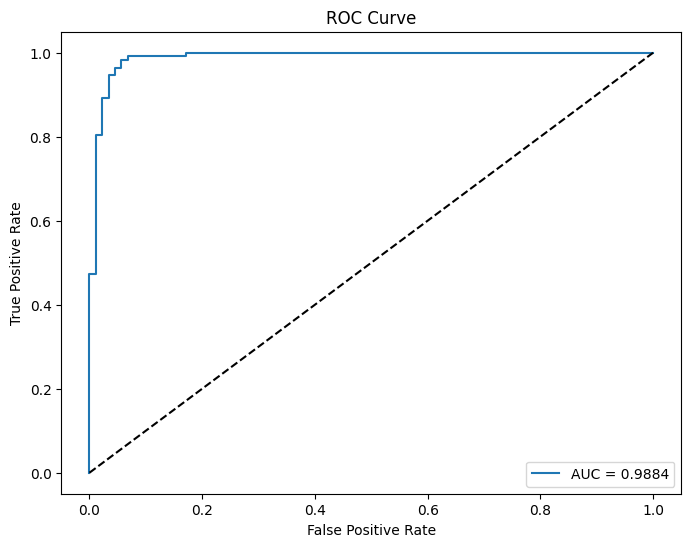

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [16]:
from sklearn.model_selection import cross_val_score

# Replace 'model' with 'svm_model'
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')  # 5-Fold CV
print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

Cross-Validation Accuracy: 0.9662 ± 0.0094


In [18]:
import numpy as np # Import numpy
from sklearn.model_selection import learning_curve

# Compute learning curve, replacing 'model' with 'svm_model'
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

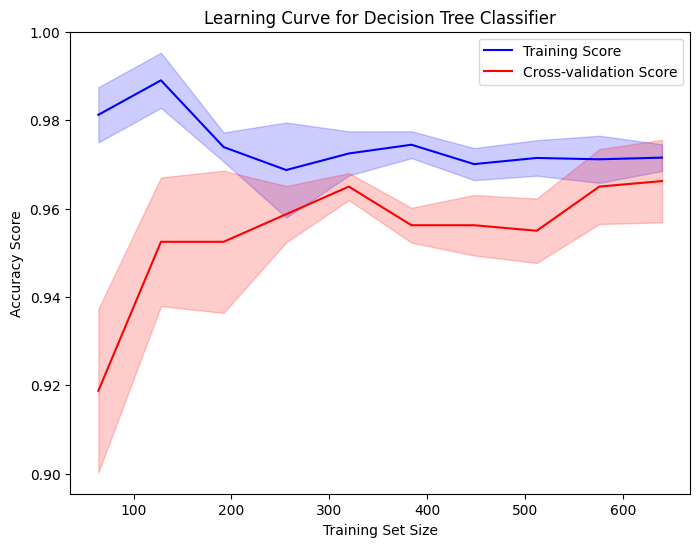

In [19]:
plt.figure(figsize=(8,6))

# Plot training curve
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)

# Plot validation curve
plt.plot(train_sizes, test_mean, label="Cross-validation Score", color="red")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

# Labels and title
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve for Decision Tree Classifier")
plt.legend()
plt.show()


In [20]:
# Analyze the learning curve
train_mean = np.mean(train_scores, axis=1)
# val_mean = np.mean(val_scores, axis=1)  # This line was causing the error
val_mean = np.mean(test_scores, axis=1)  # Use 'test_scores' instead which is already calculated

print("Training Scores:", train_mean)
print("Validation Scores:", val_mean)

# Check for underfitting/overfitting
if train_mean[-1] < 0.8 and val_mean[-1] < 0.8:
    print("Model is underfitting (high bias).")
elif train_mean[-1] > 0.9 and val_mean[-1] < 0.8:
    print("Model is overfitting (high variance).")
else:
    print("Model is performing well (good fit).")

Training Scores: [0.98125    0.9890625  0.97395833 0.96875    0.9725     0.97447917
 0.97008929 0.97148437 0.97118056 0.9715625 ]
Validation Scores: [0.91875 0.9525  0.9525  0.95875 0.965   0.95625 0.95625 0.955   0.965
 0.96625]
Model is performing well (good fit).
